<a href="https://colab.research.google.com/github/khakhiD/ML/blob/main/Doraemon_Classification/Doraemon_classification_with_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ResNet50 모델 사용한 이미지 분류기 구현**
---
### **ResNet?**
- ResNet은 Microsoft에서 개발한 모델, ImageNet2016에서 96.4%의 정확도로 우승
- VGG-16과 같이 ConV와 Pooling의 반복으로 Feature extraction, 마지막에 Fully-Connected-Layer를 통해 분류
- VGG-16과 다른 점은 이전 Layer와 다음 Layer를 연결하는 연결 선이 존재
---
### **우리가 구현할 분류기**
- **"도라에몽과 고양이를 구분하는 이미지 분류기"**
- ***ResNet-ImageNet 전이 학습을 활용***
- **Custom Dataset**
  - 도라에몽 이미지 15장
  - 고양이 이미지 15장
  - 테스트 이미지 10장

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [10]:
url = 'https://github.com/khakhiD/ML/raw/main/data/doraemon_preprocessed/'
dora_images = []

for i in range(15):
  file = url + 'doraemon%20({}).jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (224,224))
  dora_images.append(img)
print(len(dora_images))

15


In [9]:
url = 'https://github.com/khakhiD/ML/raw/main/data/cat_preprocessed/'
cat_images = []

for i in range(15):
  file = url + 'cat%20({}).jpg'.format(i+1)
  img = imread(file)
  img = resize(img, (224,224))
  cat_images.append(img)
print(len(cat_images))

15


<Figure size 432x288 with 0 Axes>

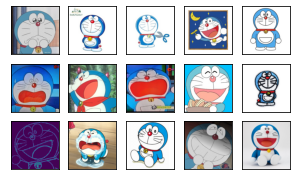

<Figure size 432x288 with 0 Axes>

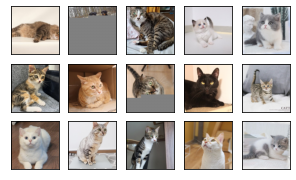

In [11]:
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(3,5, dora_images)
plot_images(3,5, cat_images)

In [ ]:
X = dora_images + animal_images
# 얼굴 이미지는 1, 얼굴이 아닌 이미지는 0 - sparse_categorical_entropy 
y = [[1]]* len(face_images) + [[0]] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

In [ ]:
import tensorflow as tf
import tensorflow.python.keras
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import models, layers
from keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False, 
              input_shape=(75, 75, 3))

last_layer = resnet.get_layer('block4_pool')
last_output = last_layer.output

for layer in resnet.layers:
   layer.trainable = False

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(resnet.input, my_layer)

transfer_learner.compile(optimizer='adam',
                         loss='mse',
                         metrics=['accuracy'])


ValueError: ignored

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# 결과를 튜플의 리스트(클래스, 설명, 확률)로 디코딩합니다
# (배치 내 각 샘플 당 하나의 리스트)
print('Predicted:', decode_predictions(preds, top=3)[0])
# 예측결과: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]